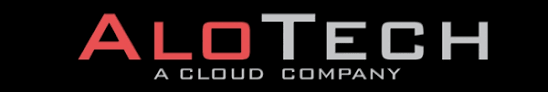

   # .......... AloTech (CitiBike) Veri Analizi ve Raporlama Örnek Çalışması ..........

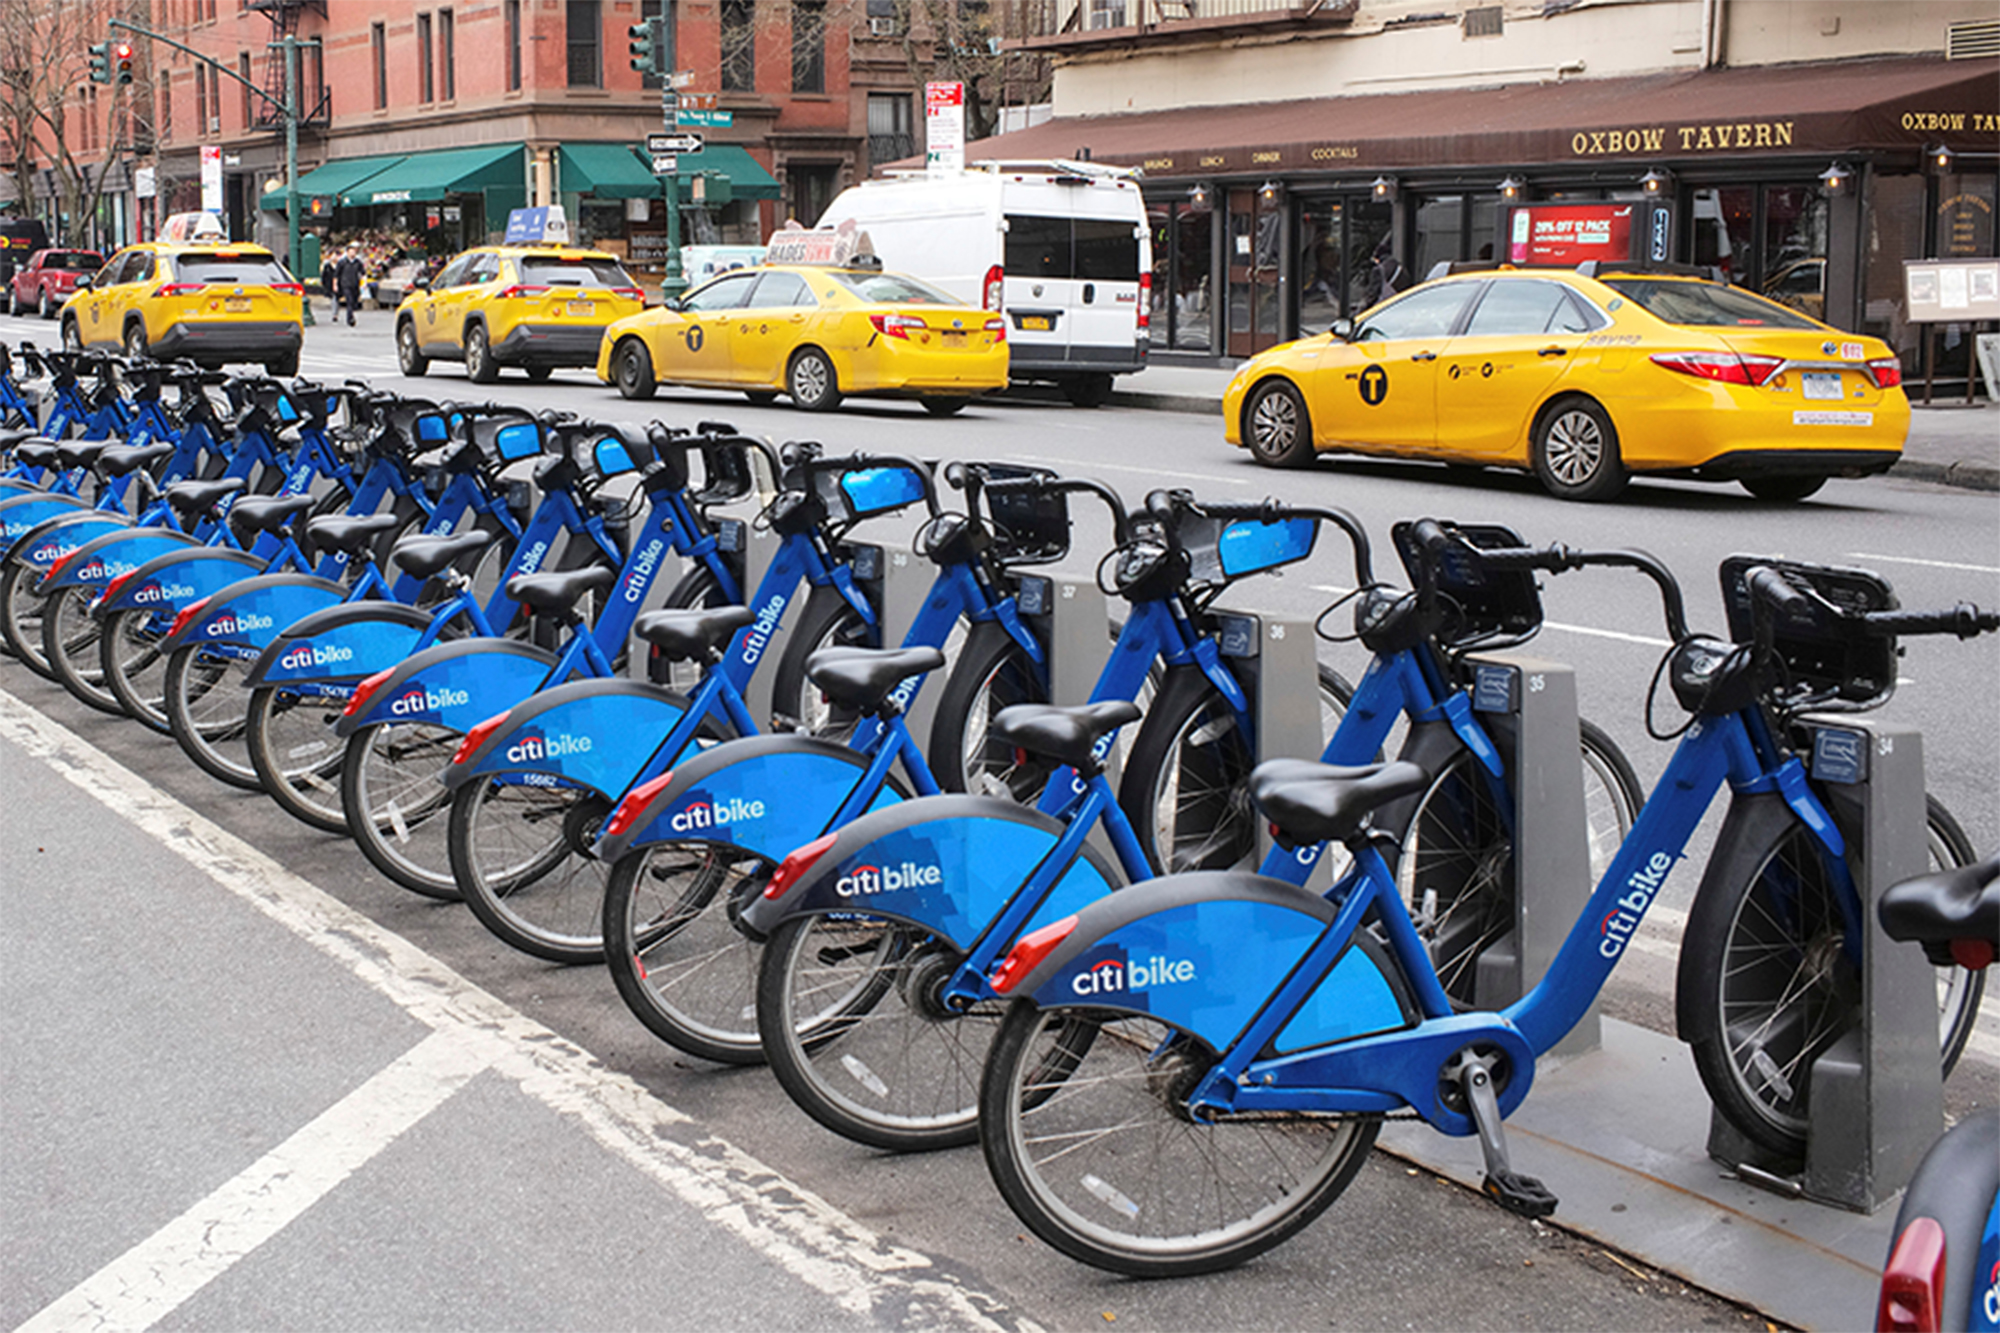

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

%matplotlib inline
# %matplotlib notebook

plt.rcParams["figure.figsize"] = (14,8)
# plt.rcParams['figure.dpi'] = 100

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

pd.options.display.max_rows = 500
pd.options.display.max_columns = 100

In [2]:
df2 = pd.read_csv("citibike.csv")
df = df2.copy()

In [3]:
df.head()

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,customer_plan
0,318,2018-01-27T20:08:17.638000,2018-01-27T20:13:35.923000,331,Pike St & Monroe St,40.71,-73.99,3489,Gold St & Frankfort St,40.71,-74.00,26575,Subscriber,1983,male,NaN
1,695,2018-01-24T06:33:21.794000,2018-01-24T06:44:57.566000,349,Rivington St & Ridge St,40.72,-73.98,3489,Gold St & Frankfort St,40.71,-74.00,32756,Subscriber,1985,female,NaN
2,276,2018-01-18T17:54:17.279000,2018-01-18T17:58:54.194000,308,St James Pl & Oliver St,40.71,-74.00,3489,Gold St & Frankfort St,40.71,-74.00,16056,Subscriber,1975,male,NaN
3,253,2018-01-07T16:08:14.778000,2018-01-07T16:12:28.648000,308,St James Pl & Oliver St,40.71,-74.00,3489,Gold St & Frankfort St,40.71,-74.00,25309,Subscriber,1975,male,NaN
4,720,2018-01-11T17:53:48.536000,2018-01-11T18:05:48.757000,308,St James Pl & Oliver St,40.71,-74.00,3489,Gold St & Frankfort St,40.71,-74.00,29817,Subscriber,1975,male,NaN


In [4]:
min_date = min(df["starttime"])
max_date = max(df["stoptime"])
print("Veri Tarih Aralığı: ", min_date, "-", max_date)

Veri Tarih Aralığı:  2018-01-01T06:52:07.650000 - 2018-04-18T12:51:08.162000


In [5]:
bike_count = df.bikeid.nunique()
print("Bisiklet Sayısı : ",bike_count)

Bisiklet Sayısı :  944


### null değer içeren sütun silinecek.

In [6]:
df.customer_plan.value_counts()

Series([], Name: customer_plan, dtype: int64)

In [7]:
df = df.drop(columns="customer_plan", axis=1)

In [8]:
df.isna().sum() # başka null değer içeren veri yok.

tripduration               0
starttime                  0
stoptime                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bikeid                     0
usertype                   0
birth_year                 0
gender                     0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tripduration             1000 non-null   int64  
 1   starttime                1000 non-null   object 
 2   stoptime                 1000 non-null   object 
 3   start_station_id         1000 non-null   int64  
 4   start_station_name       1000 non-null   object 
 5   start_station_latitude   1000 non-null   float64
 6   start_station_longitude  1000 non-null   float64
 7   end_station_id           1000 non-null   int64  
 8   end_station_name         1000 non-null   object 
 9   end_station_latitude     1000 non-null   float64
 10  end_station_longitude    1000 non-null   float64
 11  bikeid                   1000 non-null   int64  
 12  usertype                 1000 non-null   object 
 13  birth_year               1000 non-null   int64  
 14  gender                   

In [10]:
df["starttime"] = pd.to_datetime(df["starttime"])
df["stoptime"] = pd.to_datetime(df["stoptime"])

# tarihlerin dtype ı değiştirildi.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   tripduration             1000 non-null   int64         
 1   starttime                1000 non-null   datetime64[ns]
 2   stoptime                 1000 non-null   datetime64[ns]
 3   start_station_id         1000 non-null   int64         
 4   start_station_name       1000 non-null   object        
 5   start_station_latitude   1000 non-null   float64       
 6   start_station_longitude  1000 non-null   float64       
 7   end_station_id           1000 non-null   int64         
 8   end_station_name         1000 non-null   object        
 9   end_station_latitude     1000 non-null   float64       
 10  end_station_longitude    1000 non-null   float64       
 11  bikeid                   1000 non-null   int64         
 12  usertype                 1000 non-n

### Cinsiyet Kontrolü

In [12]:
df.gender.value_counts(dropna=False)

male       776
female     194
unknown     30
Name: gender, dtype: int64

In [13]:
df = df[df["gender"] != "unknown"] # bilinmeyen cinsiyetler veriden çıkarıldı.

In [14]:
df.gender.value_counts(normalize=True) # Müşterilerin yüzde 80 i erkeklerden, yüzde 20 si kadınlardan oluşuyor.

male     0.80
female   0.20
Name: gender, dtype: float64

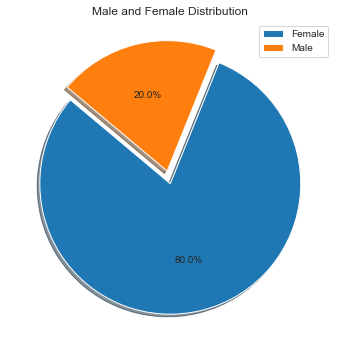

In [15]:
plt.figure(figsize=(6,6))

explode = [0, 0.1]
plt.pie(df['gender'].value_counts(), explode=explode, autopct='%1.1f%%', shadow=True,startangle=140)
plt.legend(labels=['Female','Male'])
plt.title('Male and Female Distribution')
plt.axis('off');

## Kullanım süresi aykırı değer kontrol

<AxesSubplot:>

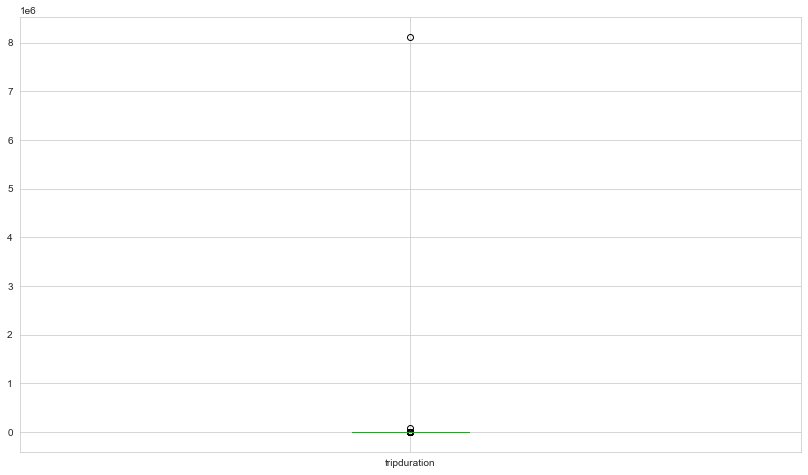

In [16]:
df.boxplot("tripduration")

In [17]:
df.tripduration.describe()

count       970.00
mean       9148.47
std      260755.85
min          66.00
25%         331.25
50%         521.50
75%         843.75
max     8121483.00
Name: tripduration, dtype: float64

In [18]:
# kullanım süresinde, std > mean olduğu için ve Q3 ile max değer arasında büyük fark görüldüğü için outlier değer tespit edildi.

In [19]:
df["tripduration_minutes"] = df["tripduration"] / 60  # kullanım süresini dakika cinsine çevirerek feature engineerin işlemi yapıldı.

In [20]:
df.tripduration_minutes.sort_values(ascending=False).head(10)

39    135358.05
923     1466.72
466      110.20
437       76.30
544       61.95
444       53.05
573       50.45
877       46.17
580       46.15
443       45.43
Name: tripduration_minutes, dtype: float64

In [21]:
# 110 dakikadan sonra daha yüksek olan değerler ayrkırı değer olarak görülüp drop edilecek.

In [22]:
trip_drop_index = df.tripduration_minutes.sort_values(ascending=False).head(2).index

In [23]:
df.drop(index=trip_drop_index, inplace=True)

## Verinin istatisksel olarak nümerik değerlerini kontrol edelim

In [24]:
df.describe() # değerlerde herhangi bir aykırı değer gözükmüyor

,tripduration,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year,tripduration_minutes
count,968.00,968.00,968.00,968.00,968.00,968.00,968.00,968.00,968.00,968.00
mean,686.49,1465.43,40.74,-73.98,3347.35,40.74,-73.98,26009.91,1978.42,11.44
std,564.04,1388.92,0.03,0.02,373.08,0.03,0.02,6412.48,12.22,9.40
min,66.00,83.00,40.66,-74.02,282.00,40.66,-74.01,14558.00,1939.00,1.10
25%,330.75,385.00,40.73,-73.99,3238.00,40.73,-73.99,19386.50,1969.00,5.51
50%,520.50,498.50,40.75,-73.98,3427.00,40.74,-73.98,28771.50,1981.00,8.68
75%,843.00,3163.00,40.76,-73.97,3463.00,40.76,-73.97,31572.25,1989.00,14.05
max,6612.00,3660.00,40.81,-73.92,3664.00,40.81,-73.93,33466.00,2000.00,110.20


## Bu yıl itibari ile doğum yılları kullanılarak yaş sütunu oluşturulacak

In [25]:
df.birth_year.unique()

array([1983, 1985, 1975, 1956, 1996, 1978, 1989, 1974, 1990, 1980, 1987,
       1967, 1963, 1984, 1988, 1991, 1986, 1977, 1992, 1982, 1971, 1993,
       1981, 1970, 1966, 1979, 1955, 1952, 1973, 1954, 1976, 1953, 1972,
       1995, 1965, 1958, 1969, 1959, 1961, 1964, 1946, 1968, 1962, 1949,
       1950, 1957, 2000, 1939, 1948, 1994, 1998, 1997, 1951, 1960, 1943,
       1999, 1945], dtype=int64)

In [26]:
df["age"] = df.birth_year.apply(lambda x : 2023 - x)

In [27]:
df.age.unique()

array([40, 38, 48, 67, 27, 45, 34, 49, 33, 43, 36, 56, 60, 39, 35, 32, 37,
       46, 31, 41, 52, 30, 42, 53, 57, 44, 68, 71, 50, 69, 47, 70, 51, 28,
       58, 65, 54, 64, 62, 59, 77, 55, 61, 74, 73, 66, 23, 84, 75, 29, 25,
       26, 72, 63, 80, 24, 78], dtype=int64)

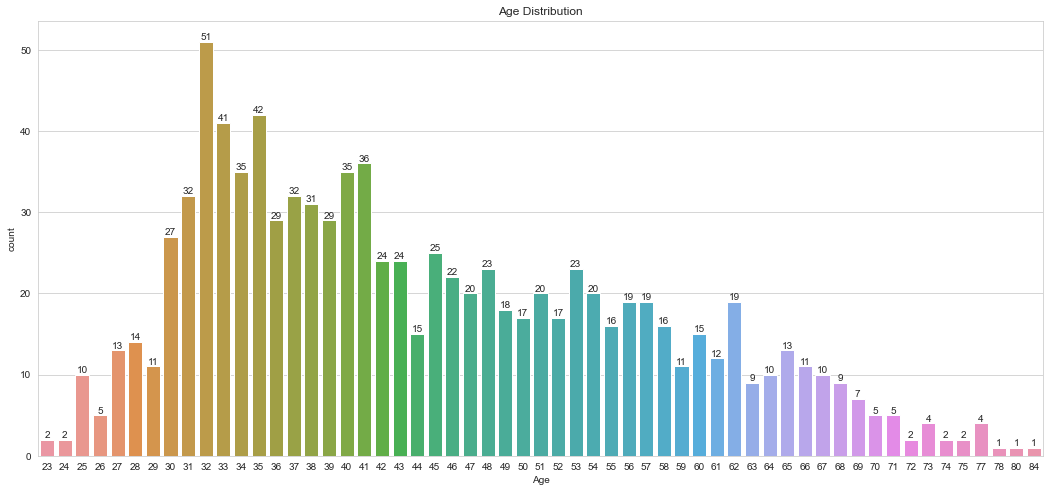

In [28]:
# yaş dağılımını grafik olarak inceleyelim

plt.figure(figsize=(18,8))
ax = sns.countplot(x ='age', data = df)
plt.title('Age Distribution')
plt.xlabel('Age')
ax.bar_label(ax.containers[0]);

#### Yaş dağılımı : Genel olarak 30 ile 45 yaş arasında yüksek bir dağılım gözlenmektedir.
#### -------------------------------------------------------------------------------------------------------------------------


### Doğum Yıllarına Göre Müşterilerin Kuşaklara Ayrılmasını inceleyelim

In [29]:
df["generation"] = df.birth_year.apply(lambda x : 'Boomer' if 1964>= x >=1946 else 'X' if 1979>= x >=1965 else 
                                       'Y' if 1995>= x >=1980 else 'Z' if 2020>= x >=1996 else 'Other')

In [30]:
df.generation.value_counts() 

Y         493
X         290
Boomer    150
Z          32
Other       3
Name: generation, dtype: int64

In [31]:
df = df[df["generation"] != 'Other'] # 3 adet diğer yıllarda doğan müşteriler veriden silindi.

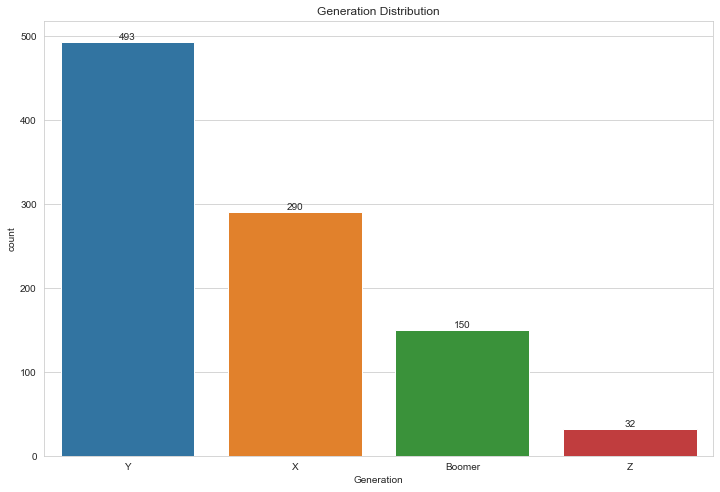

In [32]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x ='generation', data = df)
plt.title('Generation Distribution')
plt.xlabel('Generation')
ax.bar_label(ax.containers[0]);

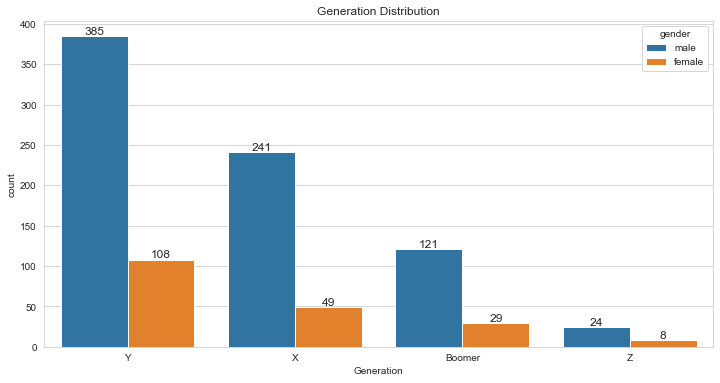

In [33]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x ='generation', data = df, hue="gender")
plt.title('Generation Distribution')
plt.xlabel('Generation')
for bars in ax.containers:
        ax.bar_label(bars, size=12)

#### Sonuç: Verimizde, Y kuşağı bisiklet kullanımında ön plana çıkarken, Z kuşağının en az bisiklet kullanımına sahip olmasıda ayrıca göze çarpıyor. Ayrıca Erkeklerin, kadınlara göre bisiklet kullanımında daha ön planda olduğu gözlemlenirken, Y kuşağı kadınlarının diğer kuşak kadınlarına göre bisiklet kullanımına daha sıcak baktığını söyleyebiliriz.
##### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Cinsiyet kırılımında Kuşaklarına ve Üyelik Tiplerine Göre Bisiklet Kullanım Süreleri

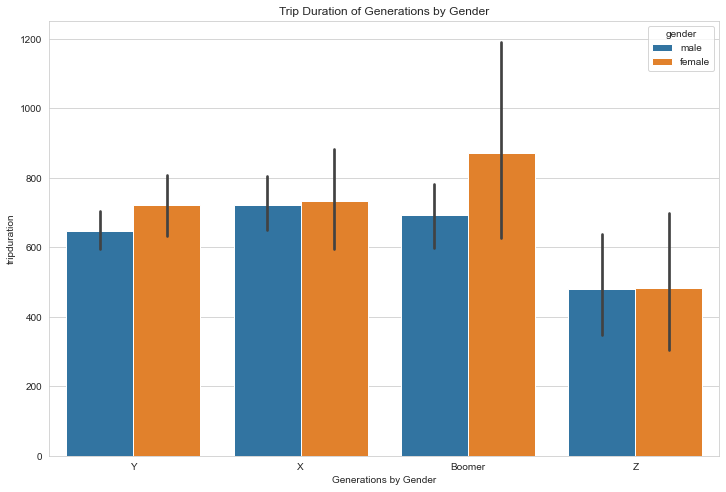

In [34]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x="generation", y="tripduration", hue="gender")
plt.title('Trip Duration of Generations by Gender')
plt.xlabel('Generations by Gender');

#### Sonuç: Yukarıda incelediğimiz sonuçlara göre, erkekler bisiklet kullanım sayılarında kadınlara farklı bir şekilde üstün görünsede, kadınların bisiklet kullanım süreleri erkeklerin kullanım sürelerinden daha uzun olduğu gözlemleniyor. Özellikle Boomer kuşağında kadınların seyahat süreleri erkeklere göre daha uzun. Kısaca, erkekler bisikler kullanımlarını kısa süreli yaparken, kadınlar kullanım sürelerini daha uzun tutuyor.

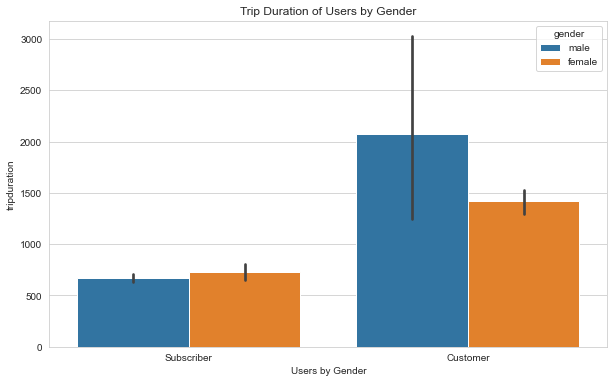

In [35]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="usertype", y="tripduration", hue="gender")
plt.title('Trip Duration of Users by Gender')
plt.xlabel('Users by Gender');

#### Sonuç: Abone olmayan müşterilerin kullanım süreleri daha fazla olurken, abonelerin kullanım süreleri daha kısıtlı kalmıştır. Buradan şöyle bir yorum çıkarmak mümkün olabilir; aboneler günlük belirli ihtiyaçları için bisiklet kullanımı yaparken(işe gidiş geliş gibi), abone olmayan müşteriler anlık ve daha uzun süreli ihtiyaçlarına yönelik bisiklet kullanımına sahip olmuş olabilir(spor veya gezinti kullanımı için).

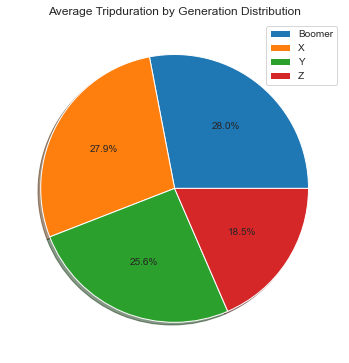

In [36]:
# Kuşaklara göre ortalama kullanım süreleri

plt.figure(figsize=(6,10))

plt.pie(df.groupby("generation")["tripduration"].mean(), autopct='%1.1f%%', shadow=True)
plt.legend(labels=df.groupby("generation")["tripduration"].mean().index)
plt.title('Average Tripduration by Generation Distribution')
plt.axis('off');

#### Sonuç: Yukarıda çıkarmış olduğumuz sonuçlarda Z kuşağının kullanım sayısı diğer kuşaklara göre daha az iken, burada ortalama kullanım süreleri arasında çok büyük fark olmadığını görüyoruz. Yine diğer bir deyişle, Y kuşağı bisiklet kullanım sayısı diğer kuşaklara göre çok fazla iken, kullanım süreleri ortalamaları arasında çok büyük farklar olmadığını gözlemliyoruz.

#### Buradan yine şöyle bir yorum çıkarabiliriz; Y kuşağı bisiklet kullanımını günlük ihtiyaçları için sınırlı tutarken, diğer kuşaklar değişken ihtiyaçları için bisiklet kullanımına sahip olabiliyor. 

## --------------------------------------------------------------------------------------------------------------------------------

In [37]:
start_st_cnt = df["start_station_id"].nunique()
end_st_cnt = df["end_station_id"].nunique()

print("Başlangıç İstasyonu Sayısı: ",start_st_cnt)
print("Varış İstasyonu Sayısı: ", end_st_cnt)

Başlangıç İstasyonu Sayısı:  381
Varış İstasyonu Sayısı:  60


### Kullanımına Göre Popüler 10 Başlangıç İstasyonu

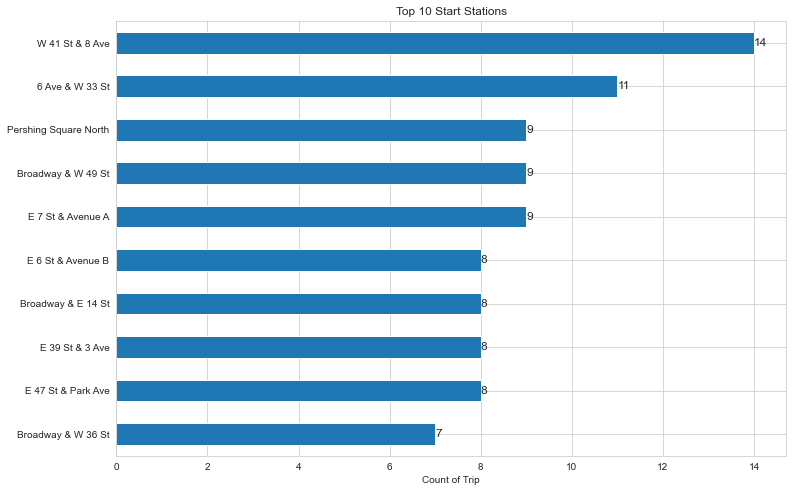

In [38]:
plt.figure(figsize=(12,8))
ax = df.start_station_name.value_counts().head(10).sort_values(ascending=True).plot(kind="barh")
plt.title('Top 10 Start Stations')
plt.xlabel('Count of Trip')
for bars in ax.containers:
        ax.bar_label(bars, size=12)

### Kullanımına Göre Popüler 10 Varış İstasyonu

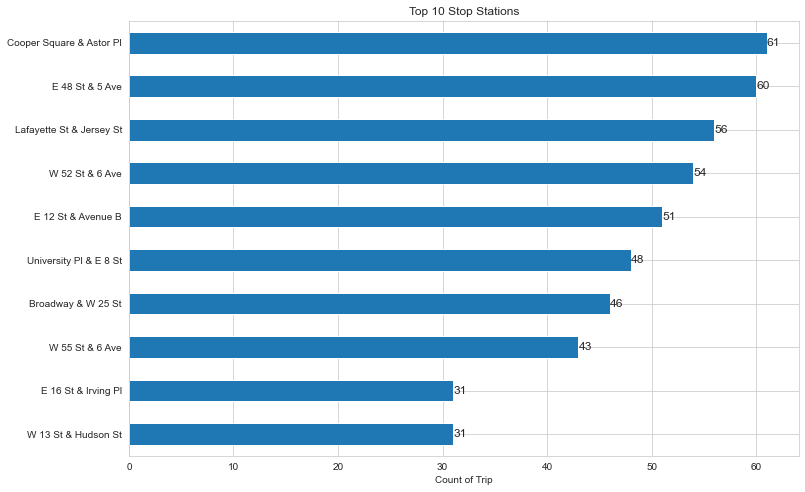

In [39]:
plt.figure(figsize=(12,8))
ax = df.end_station_name.value_counts().head(10).sort_values(ascending=True).plot(kind="barh")
plt.title('Top 10 Stop Stations')
plt.xlabel('Count of Trip')
for bars in ax.containers:
        ax.bar_label(bars, size=12)

### En Popüler 10 Başlangıç-Varış İstasyonu Rotası

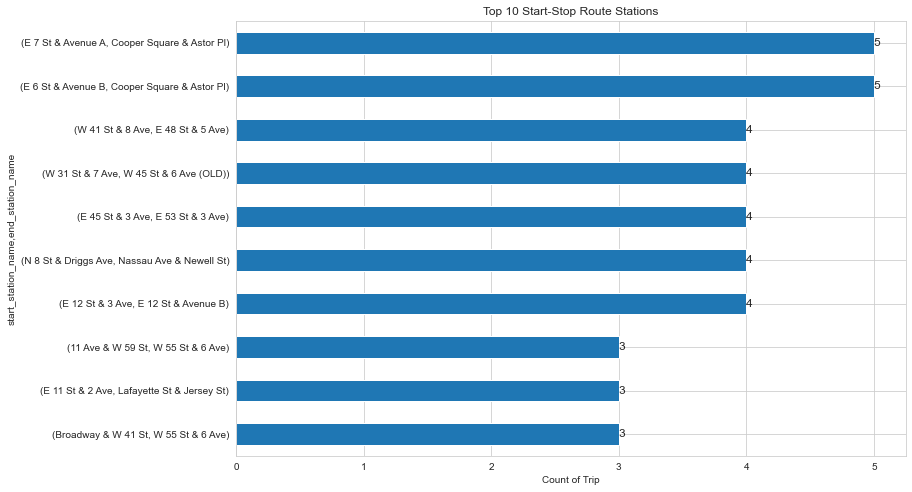

In [40]:
plot_station = df.groupby("start_station_name")["end_station_name"].value_counts().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,8))
ax = plot_station.sort_values(ascending=True).plot(kind="barh")
plt.title('Top 10 Start-Stop Route Stations')
plt.xlabel('Count of Trip')
for bars in ax.containers:
        ax.bar_label(bars, size=12)

### Başlangıç ve Varış İstasyonu Aynı Olan Seyahatler ve Süreleri

In [41]:
(df["start_station_name"] == df["end_station_name"]).value_counts() # bu şekilde 14 seyahat mevcut

False    951
True      14
dtype: int64

In [42]:
df["round_trip"] = df["start_station_name"] == df["end_station_name"]

<Figure size 864x576 with 0 Axes>

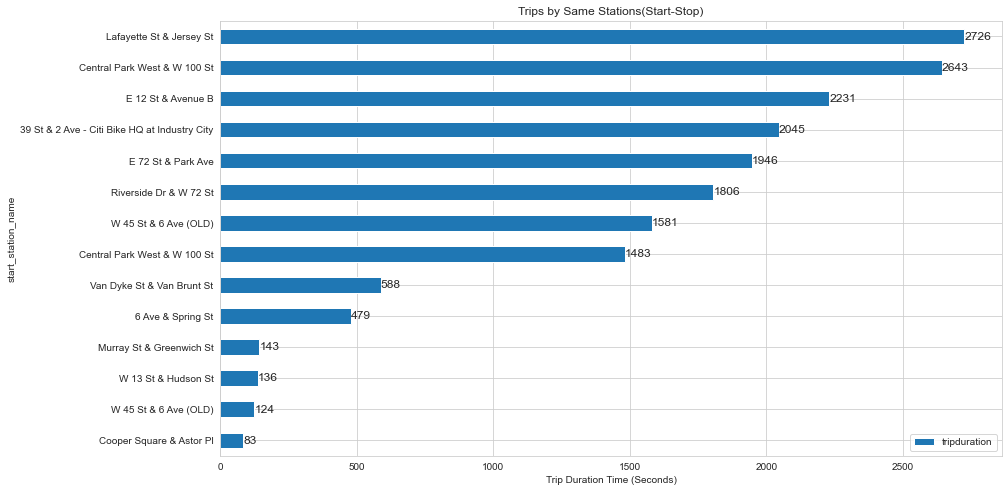

In [43]:
plt.figure(figsize=(12,8))
ax = df[df["round_trip"] == True][["start_station_name","tripduration"]].sort_values(by="tripduration").set_index("start_station_name").plot(kind="barh")
plt.title('Trips by Same Stations(Start-Stop)')
plt.xlabel('Trip Duration Time (Seconds)')

for bars in ax.containers:
        ax.bar_label(bars, size=12)
plt.show()

### Dakika bazlı kullanım süresi dağılımı

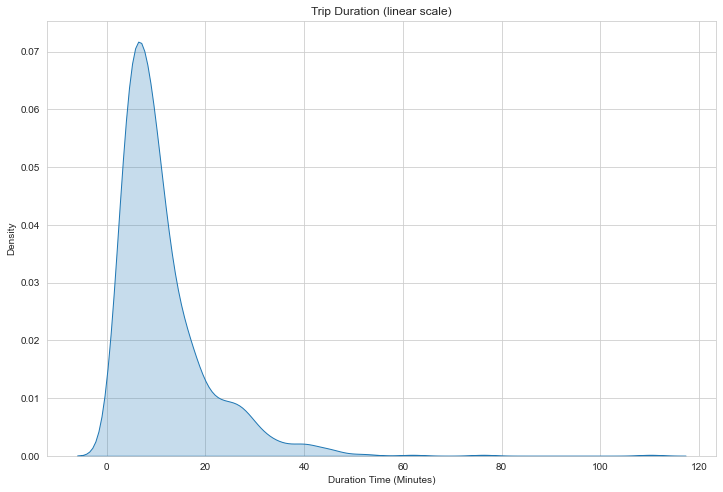

In [44]:
fig = plt.figure(figsize=(12,8))
ax = sns.kdeplot(df["tripduration_minutes"], shade=True)
ax.set_title("Trip Duration (linear scale)")
ax.set_xlabel("Duration Time (Minutes)")

plt.show()

### Saatlere Göre Günlük Bisiklet Kullanımı Dağılımı

In [45]:
rides_per_hour = df["starttime"].dt.hour.value_counts(sort=False)

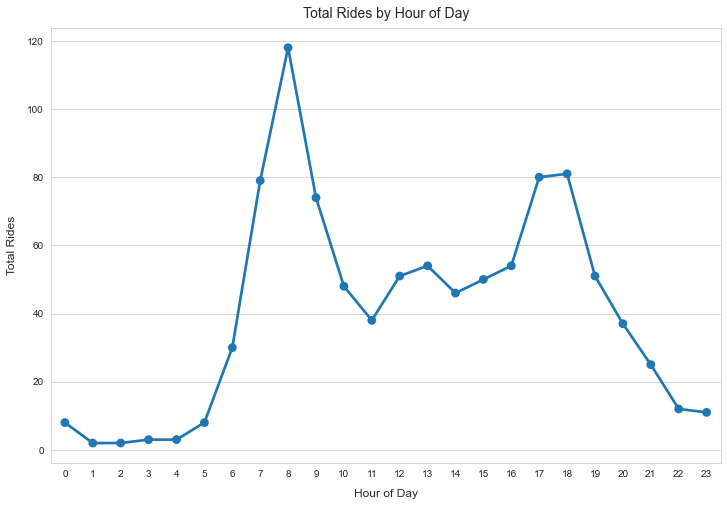

In [46]:
fig = plt.figure(figsize=(12,8))
ax = sns.pointplot(x=rides_per_hour.index, y=rides_per_hour)
ax.set_title("Total Rides by Hour of Day", fontsize=14, pad=10)
ax.set_xlabel("Hour of Day", fontsize=12, labelpad=10)
ax.set_ylabel("Total Rides", fontsize=12, labelpad=10)

plt.show()

#### Sonuç: Kullanımın Rush-Hour saatlerinde arttığı gözlemleniyor.

### ------------------------------------------------------------------------------------------

### Günlere Göre Haftalık Bisiklet Kullanımı

In [47]:
rides_per_weekday = df["starttime"].dt.day_name().value_counts(sort=False)

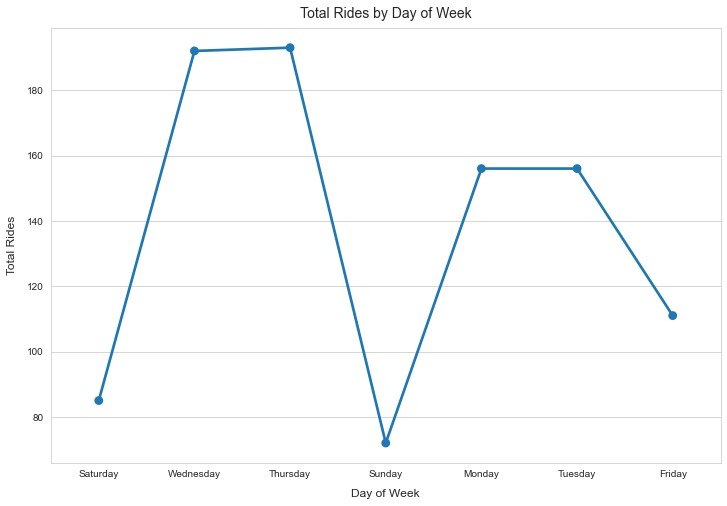

In [48]:
fig = plt.figure(figsize=(12,8))
ax = sns.pointplot(x=rides_per_weekday.index, y=rides_per_weekday)
ax.set_title("Total Rides by Day of Week", fontsize=14, pad=10)
ax.set_xlabel("Day of Week", fontsize=12, labelpad=10)
ax.set_ylabel("Total Rides", fontsize=12, labelpad=10)

plt.show()

#### Sonuç: Yukarıda incelediğimiz saatlere göre günlük bisiklet kullanımınıda göz önünde bulundurursak, hafta içi mesai saatlerinde bisiklet kullanımının yoğun olduğunu gözlemleyebiliriz.

### ----------------------------------------------------------------------------------------------------------------------------------------------------

### Günlere Göre Aylık Bisiklet Kullanımı

In [49]:
rides_per_day = df["starttime"].dt.day.value_counts(sort=False)

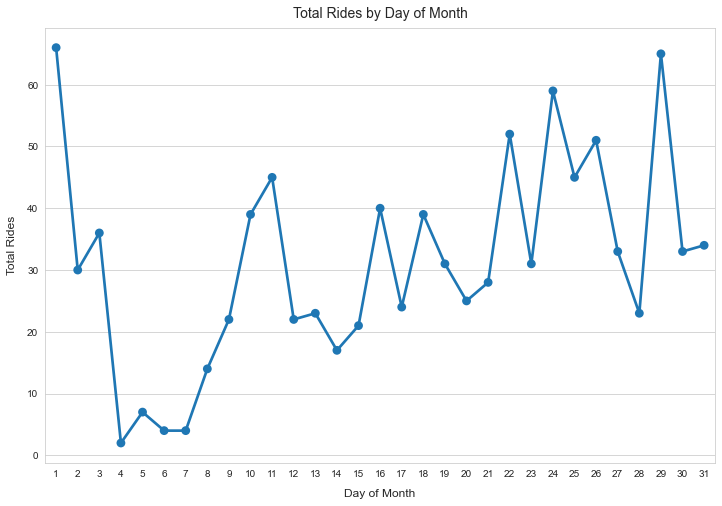

In [50]:
fig = plt.figure(figsize=(12,8))
ax = sns.pointplot(x=rides_per_day.index, y=rides_per_day)
ax.set_title("Total Rides by Day of Month", fontsize=14, pad=10)
ax.set_xlabel("Day of Month", fontsize=12, labelpad=10)
ax.set_ylabel("Total Rides", fontsize=12, labelpad=10)

plt.show()

### ----------------------------------------------------------------------------------------------------------------------------------------------------

### Aylara Göre Yıllık Bisiklet Kullanımı

In [51]:
rides_per_month = df["starttime"].dt.month_name().value_counts(sort=False)

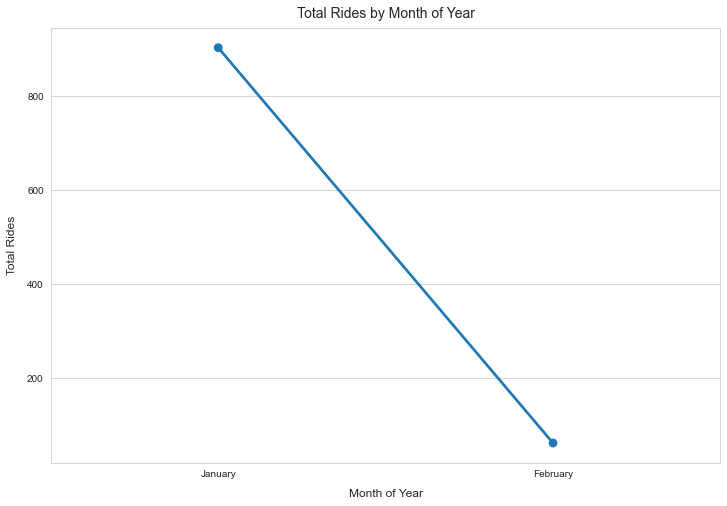

In [52]:
fig = plt.figure(figsize=(12,8))
ax = sns.pointplot(x=rides_per_month.index, y=rides_per_month)
ax.set_title("Total Rides by Month of Year", fontsize=14, pad=10)
ax.set_xlabel("Month of Year", fontsize=12, labelpad=10)
ax.set_ylabel("Total Rides", fontsize=12, labelpad=10)

plt.show()

### ----------------------------------------------------------------------------------------------------------------------------------------------------

### Cinsiyetlere ve Günlük Saatlere Göre Bisiklet Kullanım Dağılımı

In [53]:
male = df[df["gender"] == "male"]
female = df[df["gender"] == "female"]

male_rides_per_hour = male.starttime.dt.hour.value_counts(sort=False)
female_rides_per_hour = female.starttime.dt.hour.value_counts(sort=False)

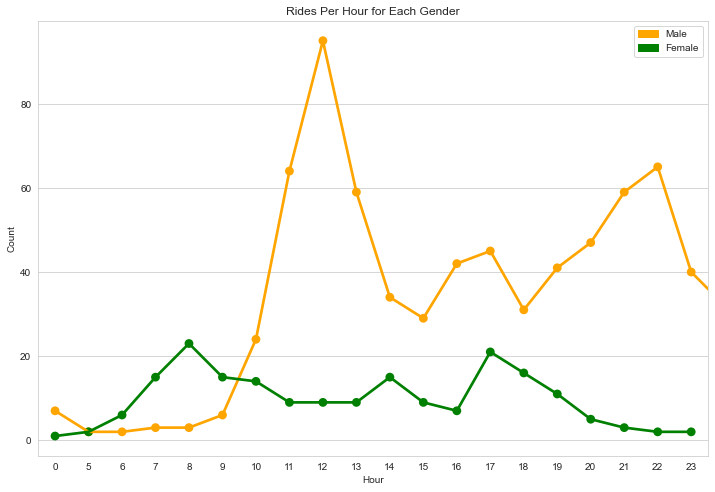

In [54]:
fig = plt.figure(figsize=(12,8))
male = sns.pointplot(x=male_rides_per_hour.index, y=male_rides_per_hour, color="orange")
female = sns.pointplot(x=female_rides_per_hour.index, y=female_rides_per_hour, color="green")

plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Rides Per Hour for Each Gender")

patch1 = mpatches.Patch(color="orange", label="Male")
patch2 = mpatches.Patch(color="green", label="Female")
plt.legend(handles=[patch1, patch2])

plt.show()

#### Sonuç: Erkeklerin bisiklet kullanımları öğle saatlerinde ve gece saatlerinde yoğunluk gösterirken, kadınların bisiklet kullanımları işe giriş-çıkış saatlerinde yoğunluk göstermektedir.

### ----------------------------------------------------------------------------------------------------------------------------------------------------

### Kuşaklarına ve Günlük Saatlere Göre Bisiklet Kullanım Dağılımı

In [55]:
boomer = df[df["generation"] == "Boomer"]
X = df[df["generation"] == "X"]
Y = df[df["generation"] == "Y"]
Z = df[df["generation"] == "Z"]

boomer_rides_per_hour = boomer.starttime.dt.hour.value_counts(sort=False)
X_rides_per_hour = X.starttime.dt.hour.value_counts(sort=False)
Y_rides_per_hour = Y.starttime.dt.hour.value_counts(sort=False)
Z_rides_per_hour = Z.starttime.dt.hour.value_counts(sort=False)

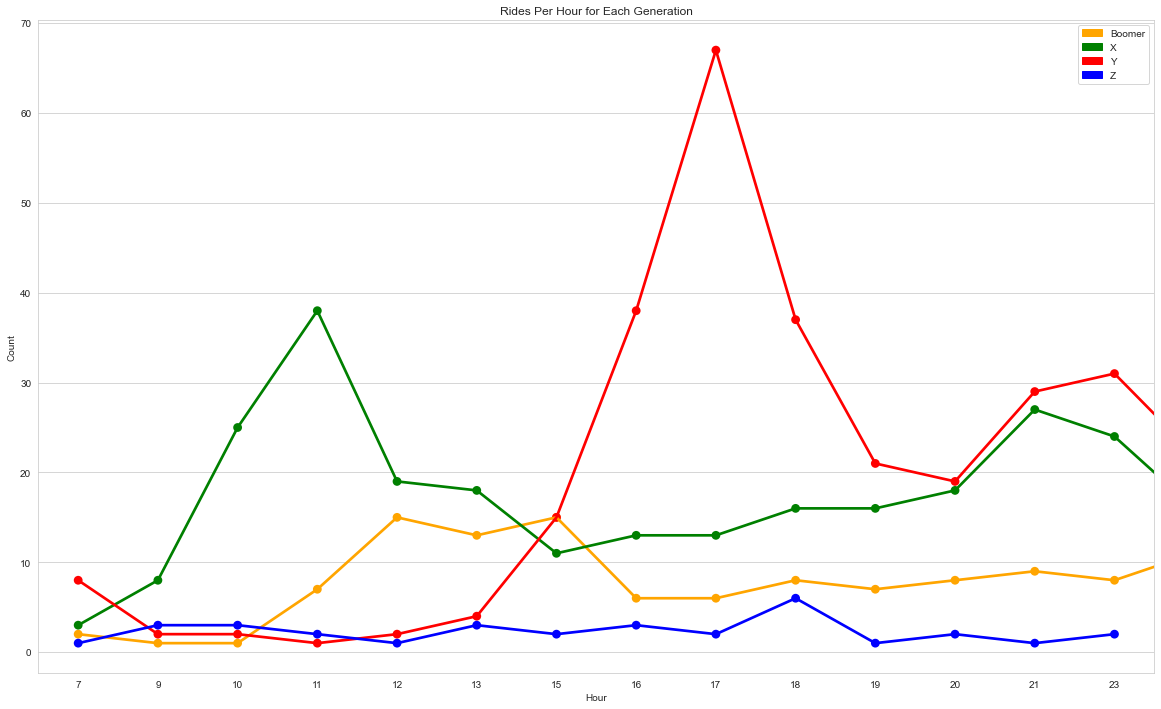

In [56]:
fig = plt.figure(figsize=(20,12))
boomer = sns.pointplot(x=boomer_rides_per_hour.index, y=boomer_rides_per_hour, color="orange")
X = sns.pointplot(x=X_rides_per_hour.index, y=X_rides_per_hour, color="green")
Y = sns.pointplot(x=Y_rides_per_hour.index, y=Y_rides_per_hour, color="red")
Z = sns.pointplot(x=Z_rides_per_hour.index, y=Z_rides_per_hour, color="blue")

plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Rides Per Hour for Each Generation")

patch1 = mpatches.Patch(color="orange", label="Boomer")
patch2 = mpatches.Patch(color="green", label="X")
patch3 = mpatches.Patch(color="red", label="Y")
patch4 = mpatches.Patch(color="blue", label="Z")
plt.legend(handles=[patch1, patch2, patch3, patch4])

plt.show()

#### Sonuç: X kuşağının saat 10-11 arasında, Y kuşağının ise 16-18 saatleri arasında kullanım sayılarında yoğunluk gözlemlenmektedir.

### --------------------------------------------------------------------------------------------------------------------------------------------

### Kullanıcı Tiplerine ve Günlük Saatlere Göre Bisiklet Kullanım Dağılımı

In [57]:
subs = df[df["usertype"] == "Subscriber"]
custom = df[df["usertype"] == "Customer"]

subs_rides_per_hour = subs.starttime.dt.hour.value_counts(sort=False)
custom_rides_per_hour = custom.starttime.dt.hour.value_counts(sort=False)

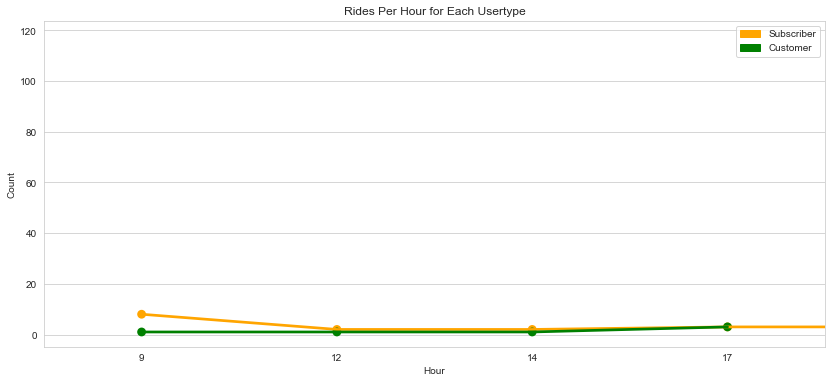

In [58]:
fig = plt.figure(figsize=(14,6))
subs = sns.pointplot(x=subs_rides_per_hour.index, y=subs_rides_per_hour, color="orange")
custom = sns.pointplot(x=custom_rides_per_hour.index, y=custom_rides_per_hour, color="green")

plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Rides Per Hour for Each Usertype")

patch1 = mpatches.Patch(color="orange", label="Subscriber")
patch2 = mpatches.Patch(color="green", label="Customer")
plt.legend(handles=[patch1, patch2])

plt.show()

## Proje Sonu !

## Final Yorum

### *Kullanılan data setinde bisiklet kullanımının hangi ektenlere/faktörlere bağlı olarak değiştiğini gözlemledik. Kullanım yoğunluğunun Hafta içinde İşe gidiş ve Dönüş Saatlerinde (Rush-Hour) yoğunlaştığını gözlemledik. 

### *Y kuşağının bisiklet kullanımına daha önem verdiğini gözlemlerken, Boomer kuşağının bisiklet kullanım süresi olarak uzun vakitler harcadığını tespit etmiş olduk.

### *Cinsiyet bakımından yorumlamak gerekir ise, kadınların erkeklere göre daha az kullanım sayısına sahip olduğunu gözlemlesekte, kullanım süreleri bakımından birbirine yakın sürelere sahip olduklarını tespit ettik. Yani, kadınların kullanım sayısı başına bisiklet ile geçirdikleri vakit erkeklere göre daha fazladır. 

### *Yaş bakımındanda yorum yapmak gerekir ise; kullanım yoğunluğunun 30-45 yaş aralığında gerçekleştiğini söylemek doğru olabilir. 